<a href="https://colab.research.google.com/github/abdulwaheedTMU/Project2/blob/main/Project2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define input image shape and batch size
IMG_HEIGHT, IMG_WIDTH = 256, 256
BATCH_SIZE = 64

# Set up directories
train_dir = '/content/drive/MyDrive/Project 2 Data/Data/train'
validation_dir = '/content/drive/MyDrive/Project 2 Data/Data/valid'
test_dir = '/content/drive/MyDrive/Project 2 Data/Data/test'

# Define augmentation pipeline for training data
train_data_gen = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomFlip("horizontal"),  # Random flipping
    tf.keras.layers.RandomRotation(0.15),      # Randomly rotate images
    tf.keras.layers.RandomZoom(0.15)           # Random zoom
])

# Rescaling only for validation and test data
val_test_data_gen = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255)
])

# Create training dataset
train_dataset = image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",  # Multi-class classification
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
).map(lambda x, y: (train_data_gen(x, training=True), y))  # Apply augmentation pipeline

# Create validation dataset
validation_dataset = image_dataset_from_directory(
    validation_dir,
    labels="inferred",
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
).map(lambda x, y: (val_test_data_gen(x, training=False), y))  # Apply rescaling


Found 1941 files belonging to 3 classes.
Found 431 files belonging to 3 classes.


STEP 2

In [ ]:
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    # Convolutional layers with Max Pooling
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flattening and Dense Layers
    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 125, 125, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │      29,491,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,604,803 (112.93 MB)

 Trainable params: 29,604,803 (112.93 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Adjust class weights to handle imbalance
#class_weights = {0:2.0, 1: 1.0, 2: 2.0}

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10,
    class_weight=class_weights
)


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.3332 - loss: 5.2037 - val_accuracy: 0.5244 - val_loss: 0.9625
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.5239 - loss: 1.5126 - val_accuracy: 0.6868 - val_loss: 0.7433
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6468 - loss: 1.3270 - val_accuracy: 0.6891 - val_loss: 0.8197
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6743 - loss: 1.2419 - val_accuracy: 0.7216 - val_loss: 0.7089
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6887 - loss: 1.1786 - val_accuracy: 0.7332 - val_loss: 0.7075
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7176 - loss: 1.1727 - val_accuracy: 0.6891 - val_loss: 0.8204
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7013 - loss: 1.1254 - val_accuracy: 0.6798 - val_loss: 0.8000
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7421 - loss: 1.0715 - val_accuracy: 0.7146 - val_loss:

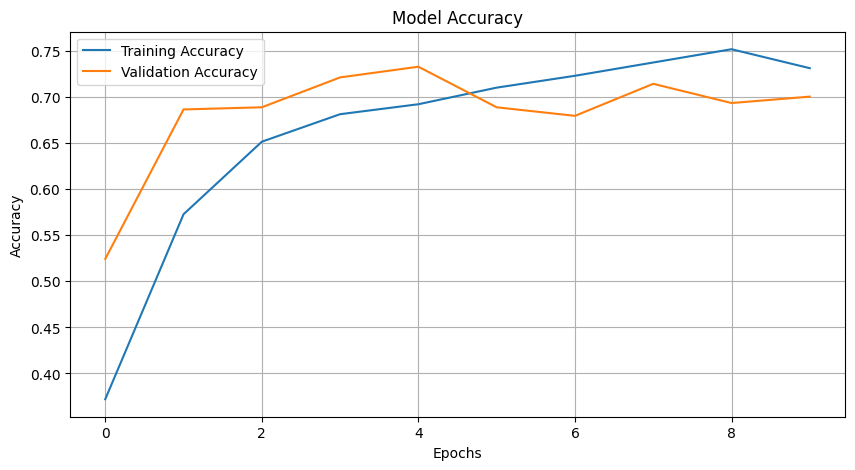

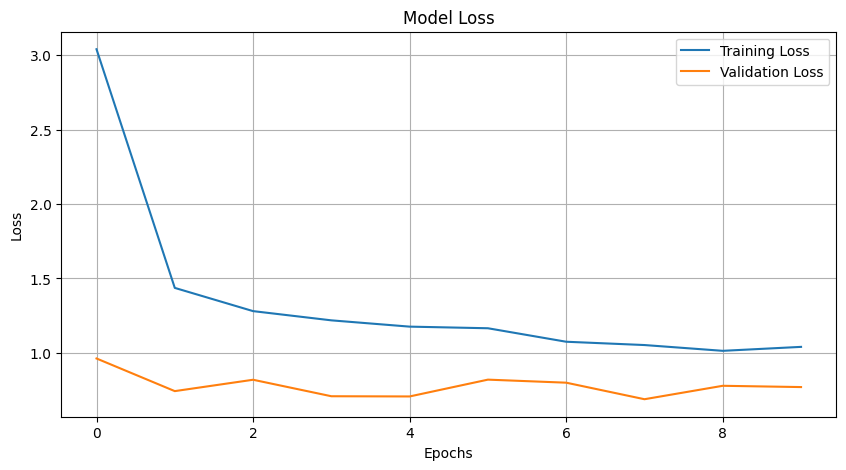

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step


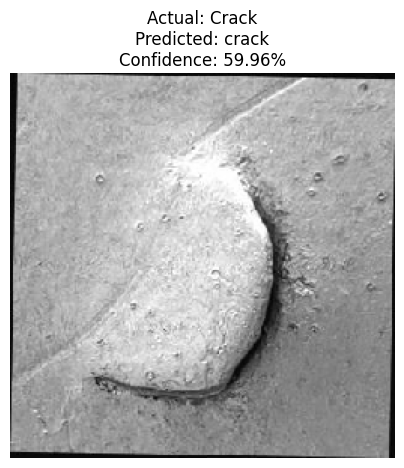

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


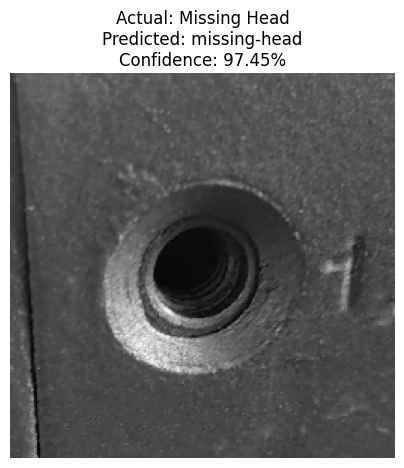

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


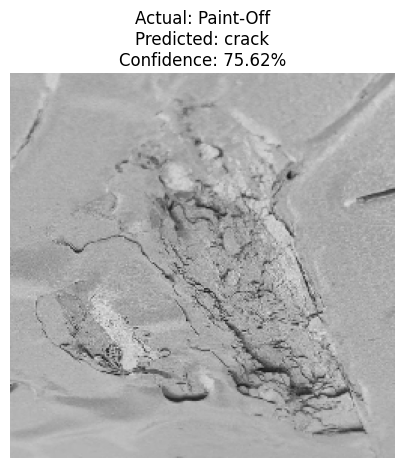

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from IPython.display import Image, display

# Define test image paths and labels
test_images = [
    {'path': '/content/drive/MyDrive/Project 2 Data/Data/test/crack/test_crack.jpg', 'label': 'Crack'},
    {'path': '/content/drive/MyDrive/Project 2 Data/Data/test/missing-head/test_missinghead.jpg', 'label': 'Missing Head'},
    {'path': '/content/drive/MyDrive/Project 2 Data/Data/test/paint-off/test_paintoff.jpg', 'label': 'Paint-Off'}
]

# Class labels
class_labels = ['crack', 'missing-head', 'paint-off']

# Preprocess and predict for each test image
for i, test_img in enumerate(test_images):
    # Load and preprocess image
    img = load_img(test_img['path'], target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = predictions[0][predicted_class] * 100
    predicted_label = class_labels[predicted_class]

    # Display prediction results
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual: {test_img['label']}\nPredicted: {predicted_label}\nConfidence: {confidence:.2f}%")
    plt.show()
